In [48]:
import pandas as pd
import numpy as np
import quandl
from sklearn.linear_model import LinearRegression
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sp500 = quandl.get("YAHOO/SP500TR", authtoken="cv7txpR8XhuYxMvfgHV2")

In [3]:
sp500.head(2)

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
1988-01-04,256.019989,256.019989,256.019989,256.019989,0.0,256.019989
1988-01-05,258.769989,258.769989,258.769989,258.769989,0.0,258.769989


In [4]:
sp500 = sp500.loc[sp500["Volume"] == 0]

In [5]:
sp500.shape

(7138, 6)

In [6]:
print(sp500.tail(10))

                   Open         High          Low        Close  Volume  \
Date                                                                     
2016-04-07  3881.679932  3881.679932  3826.770020  3841.979980     0.0   
2016-04-08  3848.850098  3877.250000  3841.649902  3852.719971     0.0   
2016-04-11  3857.679932  3881.500000  3842.020020  3842.169922     0.0   
2016-04-12  3845.550049  3885.649902  3838.060059  3879.419922     0.0   
2016-04-13  3887.899902  3920.330078  3887.899902  3918.949951     0.0   
2016-04-14  3920.229980  3929.510010  3911.290039  3920.030029     0.0   
2016-04-15  3920.620117  3920.620117  3907.899902  3916.169922     0.0   
2016-04-18  3912.659912  3942.379883  3902.989990  3941.860107     0.0   
2016-04-19  3945.070068  3960.090088  3936.850098  3954.010010     0.0   
2016-04-20  3955.600098  3973.530029  3945.850098  3957.250000     0.0   

            Adjusted Close  
Date                        
2016-04-07     3841.979980  
2016-04-08     3852.7199

In [7]:
next_days = sp500["Close"].iloc[1:]
sp500 = sp500.iloc[0:sp500.shape[0] - 1]

In [8]:
sp500.shape

(7137, 6)

In [9]:
sp500["next_day"] = next_days.values

In [10]:
sp500.head(2)

,Open,High,Low,Close,Volume,Adjusted Close,next_day
Date,,,,,,,
1988-01-04,256.019989,256.019989,256.019989,256.019989,0.0,256.019989,258.769989
1988-01-05,258.769989,258.769989,258.769989,258.769989,0.0,258.769989,259.029999


In [11]:
sp500.dtypes

Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
Adjusted Close    float64
next_day          float64
dtype: object

In [18]:
sp500["Open"] = sp500["Open"].astype(float)
sp500.rename(columns={'Close':'value'}, inplace = True)

In [36]:
regressor = LinearRegression()

# We're using 'value' as a predictor, and making predictions for 'next_day'.
# The predictors need to be in a dataframe.
# We pass in a list when we select predictor columns from "sp500" to force pandas not to generate a series.
predictors = sp500[["value"]]
to_predict = sp500["next_day"]

# Train the linear regression model on our dataset.
regressor.fit(predictors, to_predict)

# Generate a list of predictions with our trained linear regression model
next_day_predictions = regressor.predict(predictors)
print(next_day_predictions)

(7137,)
[ 2391.72764887  1975.18760161   511.48645084 ...,   439.83952754
  1918.09212958  1279.0704222 ]


In [21]:
mse = sum((to_predict - next_day_predictions)**2)/len(to_predict)
sse = mse*len(to_predict)

In [45]:
# Set a random seed to make the shuffle deterministic.
np.random.seed(1)
random.seed(1)
# Randomly shuffle the rows in our dataframe
sp500 = sp500.loc[np.random.permutation(sp500.index)]

# Select 70% of the dataset to be training data
highest_train_row = int(sp500.shape[0] * .7)
train = sp500.iloc[:highest_train_row,:]

# Select 30% of the dataset to be test data.
test = sp500.iloc[highest_train_row:,:]
regressor = LinearRegression()
predictors = train[["value"]]
to_predict = train["next_day"]

regressor.fit(predictors, to_predict)
next_day_predictions = regressor.predict(test[['value']])
mse = sum((test['next_day'] - next_day_predictions)**2)/len(next_day_predictions)

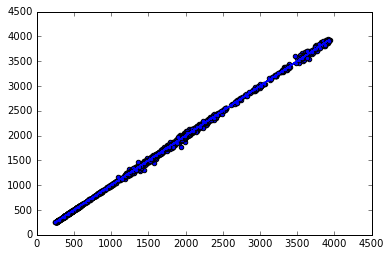

In [52]:
plt.scatter(test["value"], test["next_day"])
plt.plot(test["value"], regressor.predict(test[["value"]]))
plt.show()